## Background:

CLIP stands for Contrastive Language-Image Pre-training.
It is a joint image and text embedding model, mapping both text and images to the same embedding space. This means that the embedding of an image of a car and the embedding of the text "This is an image of a car" will be very close to each other in the vector space. This makes it suitable to use in a variety of tasks that it was not trained on.


If the model is able to perform well on the data it was not trained on, it's referred to as zero-shot learning. CLIP matched the accuracy of the ResNet-50 using this zero-shot performance!

Paper: https://arxiv.org/pdf/2103.00020

Arcticles: https://medium.com/@paluchasz/understanding-openais-clip-model-6b52bade3fa3

OpenAI summary: https://openai.com/index/clip/





## Model Details:

<center>

<img src="https://drive.google.com/uc?export=view&id=1h5Ja7izpXzE9s0mHSdieYndgyIZoUc67" alt="Contains classification metric" height="400" width="800">

Fig: CLIP methodology/architecture

</center>

1. Text Encoder:
  * Embeds the text
  * Use of a Tranformer to encode.

2. Image Encoder:
  * Embeds the image
  * Use of ResNet-50 (CNN architecture). A more recent adaptation use Vision Transformers (ViT). [ The authors found that ViT trained faster]

3. Contrastive Representation Learning:
  * Goal: To learn an embedding space such that similar samples stay close to each other while dissimilar ones are far apart.
  * How: Loss functions such as Contrastive Loss, that takes a pair of inputs and minimizes the embedding distance when they are from the same class, but maximizes the distance otherwise.
  *

ClipProcessor : prepares input data (mage and text). Handles tokenizing, normalizing,etc.

ClipModel: contains NN to process input to generate representation (similarity between text and images)

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model = CLIPModel.from_pretrained("laion/CLIP-ViT-H-14-laion2B-s32B-b79K")
processor = CLIPProcessor.from_pretrained("laion/CLIP-ViT-H-14-laion2B-s32B-b79K")

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Loading out custom image

In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = Image.open('/content/drive/MyDrive/extra/elep.jpg').convert('RGB')

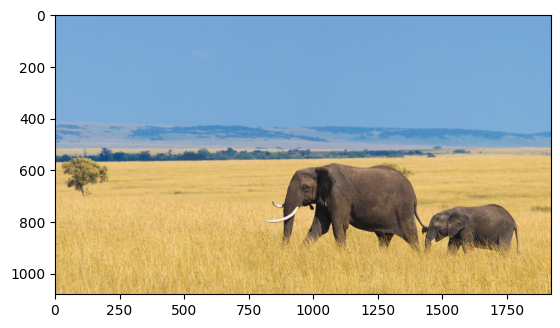

In [ ]:
plt.imshow(img)

In [ ]:
classes = ['elephant baby', 'big elephant', 'two elephants', 'a picture with two elephants']

In [ ]:
inputs = processor(text=classes, images=img, return_tensors='pt', padding = True)

In [ ]:
outputs = model(**inputs)

In [ ]:
logits_of_image = outputs.logits_per_image
logits_of_image

tensor([[21.3120, 22.3266, 26.5385, 27.1350]], grad_fn=<TBackward0>)

In [ ]:
probs = logits_of_image.softmax(dim=1)
probs

tensor([[0.0019, 0.0052, 0.3526, 0.6403]], grad_fn=<SoftmaxBackward0>)

In [ ]:
import torch
print(torch.argmax(probs))

tensor(3)


Thus the image is classified as the class "An image with two elephants".